In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [14]:
import glob

import matplotlib.pyplot as plt
import numpy as np

DATA_FOLDER = '../datasets'
VISUALIZE = 4
# Put the contents of /252-0579-00L 3DVision_project/keypoints/keypoints_final from
# https://polybox.ethz.ch/index.php/s/AkdL2sbNfKPhxwa
# in ../datasets/keypoints
# NAMES = list(map(lambda i: f'cube_20_seed_{i}', range(1, 15)))
NAMES = ['cube_20_seed_3']
THRESHOLD = 0.05


def pairwise_distances(a, b):
    N = a.shape[0]
    M = b.shape[0]
    a = np.repeat(a, M, axis=0)
    b = np.tile(b, (N, 1))
    dist = np.sqrt(np.sum((a - b) ** 2, axis=-1))
    dist = dist.reshape(N, M)
    return dist


Loaded 25 fragments.
[[0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
  1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 1. 1. 0. 0.

<IPython.core.display.Javascript object>


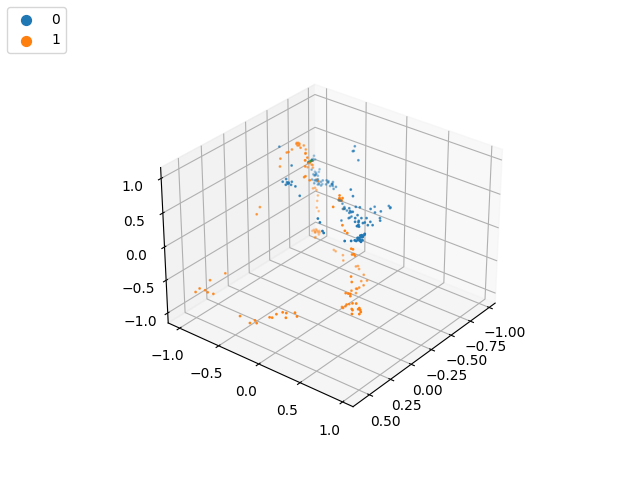

(0, 6) – number of close points: 2
Closest: 0.027692822739481926
(0, 8) – number of close points: 36
Closest: 0.016950735822319984
(0, 9) – number of close points: 0
Closest: 0.07386721670627594
(0, 10) – number of close points: 16
Closest: 0.02233298495411873
(0, 11) – number of close points: 5
Closest: 0.03611307963728905
(0, 12) – number of close points: 1
Closest: 0.04010404646396637
(0, 17) – number of close points: 1
Closest: 0.049778662621974945
(0, 19) – number of close points: 60
Closest: 0.01785360835492611
(0, 20) – number of close points: 15
Closest: 0.010455488227307796
(0, 21) – number of close points: 6
Closest: 0.017757344990968704
(0, 22) – number of close points: 10
Closest: 0.011208025738596916
(0, 23) – number of close points: 9
Closest: 0.0366336815059185
(0, 24) – number of close points: 116
Closest: 0.006533577106893063
(1, 0) – number of close points: 3
Closest: 0.03477388620376587
(1, 2) – number of close points: 0
Closest: 0.08630837500095367
(1, 4) – number o

(23, 1) – number of close points: 2
Closest: 0.0313485749065876
(23, 4) – number of close points: 68
Closest: 0.013813315890729427
(23, 6) – number of close points: 15
Closest: 0.017731238156557083
(23, 19) – number of close points: 205
Closest: 0.002341612707823515
(24, 0) – number of close points: 116
Closest: 0.006533577106893063
(24, 8) – number of close points: 32
Closest: 0.02160516381263733


<IPython.core.display.Javascript object>


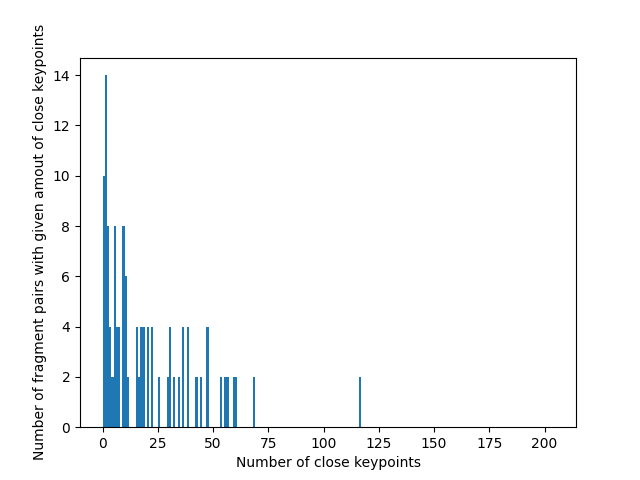

In [22]:
VISUALIZE = 1
for name in NAMES:
    # 1vN had highest scores according to last year's report.
    keypoint_folder_glob = f'{DATA_FOLDER}/keypoints/{name}_1vN/*.npy'
    num_parts = len(glob.glob(keypoint_folder_glob))
    fragments = []
    for i in range(num_parts):
        f = np.load(f'{DATA_FOLDER}/keypoints/{name}_1vN/{i}.npy')
        fragments.append(f)
    print(f'Loaded {len(fragments)} fragments.')

    matching_matrix_path = f'{DATA_FOLDER}/fragment_matchings/{name}.npy'
    matching_matrix = np.load(matching_matrix_path)
    assert num_parts == matching_matrix.shape[0] == matching_matrix.shape[
        1], f"something is wrong: {num_parts} parts loaded vs matrich matrix for {matching_matrix.shape[0]} parts."
    print(matching_matrix)
    close_points = []
    for (a_idx, b_idx), is_match in np.ndenumerate(matching_matrix):
        if is_match:
            # TODO: what is the fourth coord?
            a = fragments[a_idx][:, :3]
            b = fragments[b_idx][:, :3]
            # Calculate the distances.
            distance_matrix = pairwise_distances(a, b)  # Euclidean distance.
            # print(distance_matrix)
            print(f'{(a_idx, b_idx)} – number of close points: {(distance_matrix < THRESHOLD).sum()}')
            close_points.append((distance_matrix < THRESHOLD).sum())
            print(f'Closest: {distance_matrix.min()}')
            # Visualize.
            if VISUALIZE:
                fig = plt.figure()
                ax = fig.add_subplot(projection='3d')
                ax.scatter(a[:, 0], a[:, 2], a[:, 1], s=1, label=a_idx)
                ax.scatter(b[:, 0], b[:, 2], b[:, 1], s=1, label=b_idx)
                for (i, j), dist in np.ndenumerate(distance_matrix):
                    if dist < THRESHOLD:
                        p1 = a[i]
                        p2 = b[j]
                        ax.plot3D([p1[0], p2[0]], [p1[2], p2[2]], [p1[1], p1[1]])

                legend = plt.legend(bbox_to_anchor=(0, 1), loc="upper left", bbox_transform=fig.transFigure)
                for handle in legend.legendHandles:
                    handle.set_sizes([50.0])
                plt.show()
#                 def animate(frame):
#                   ax.view_init(30, frame/4)
#                   plt.pause(.001)
#                   return fig

#                 anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
#                 html = HTML(anim.to_html5_video())
#                 plt.close(fig)
                VISUALIZE = VISUALIZE - 1
    plt.figure()
    plt.hist(close_points, bins=range(max(close_points)))
    plt.xlabel('Number of close keypoints')
    plt.ylabel('Number of fragment pairs with given amout of close keypoints')
    plt.show()
